In [3]:
from tinysys.adapters import getexperiments

experiments = getexperiments()

for experiment in experiments.list():
    print(experiment)

Experiment(id=UUID('bb411370-28a2-423e-a2aa-bbda090be4bc'), name='digits-mnist-mlp', models=<tinysys.adapters.models.Models object at 0x7f3a61e88e30>)


In [5]:
from tinysys.adapters import getmodels

models = getmodels('digits-mnist-mlp')
print(models.list())

[Model(id='302adcec37ba79ed6a33d58956391d20', name='MLP-classifier', epoch=10, metrics=<tinysys.adapters.metrics.Metrics object at 0x7f3a6271e0f0>, modules=<tinysys.adapters.modules.Modules object at 0x7f3a6271e420>, iterations=<tinysys.adapters.iterations.Iterations object at 0x7f3a61e889e0>)]


In [6]:
model = models.read(id='302adcec37ba79ed6a33d58956391d20')

print(model.modules.last('nn'))
print(model.modules.last('criterion'))
print(model.modules.last('optimizer'))

Module(type='nn', hash='302adcec37ba79ed6a33d58956391d20', name='MLP', epoch=10, arguments={'input_size': 784, 'hidden_size': 256, 'output_size': 10, 'dropout': 0.1, 'activation': 'ReLU'})
Module(type='criterion', hash='422b735afaea4d9a688f99fbfa3c6de9', name='CrossEntropyLoss', epoch=10, arguments={})
Module(type='optimizer', hash='51de5f4e8d5a47a32892cb666f00e731', name='Adam', epoch=10, arguments={'lr': 0.001})


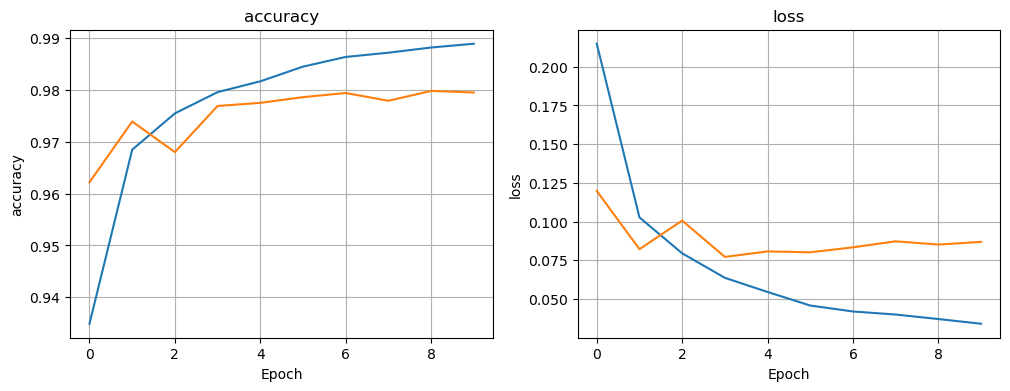

In [21]:
from matplotlib.pyplot import subplots, show
from matplotlib.axes import Axes
from tinysys.ports.metrics import Metric

def plot_metrics(ax: Axes, metrics: list[Metric]):
    ax.plot([metric.epoch for metric in metrics], [metric.value for metric in metrics])

def filter_and_plot_metrics(ax: Axes, metrics: list[Metric], name: str, yrange: tuple[float, float] = None):
    plot_metrics(ax, [metric for metric in metrics if metric.name == name and metric.phase == 'train'])
    plot_metrics(ax, [metric for metric in metrics if metric.name == name and metric.phase == 'evaluation'],)
    ax.set_title(name)
    ax.grid()
    ax.set_xlabel('Epoch')
    ax.set_ylabel(name)
    if yrange:
        ax.set_ylim(yrange)

figure, ax = subplots(1, 2, figsize=(12, 4))

metrics = model.metrics.list()
filter_and_plot_metrics(ax[0], metrics, 'accuracy')
filter_and_plot_metrics(ax[1], metrics, 'loss')
show()